In [28]:
import gdown 
import pandas as pd
from sklearn import metrics
gdown.download('https://drive.google.com/uc?id=1grV8hSxULsGvnbwEMPjPaknccfIOlcoB','cancer_data.csv',True);
data = pd.read_csv('cancer_data.csv')
data['diagnosis'].replace({'M':1, 'B':0}, inplace = True)
data.to_csv('cancer_data.csv')
del data

In [29]:
import os
import numpy as np
data_path = 'cancer.csv'
dataframe = pd.read_csv(data_path)
dataframe = dataframe[['diagnosis', 'radius_mean', 'area_mean','radius_se','area_se','smoothness_mean']]
#prints specific values 
dataframe.head()

,diagnosis,radius_mean,area_mean,radius_se,area_se,smoothness_mean
0,1,17.99,1001.0,1.0950,153.40,0.11840
1,1,20.57,1326.0,0.5435,74.08,0.08474
2,1,19.69,1203.0,0.7456,94.03,0.10960
3,1,11.42,386.1,0.4956,27.23,0.14250
4,1,20.29,1297.0,0.7572,94.44,0.10030


In [30]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   diagnosis        569 non-null    int64  
 1   radius_mean      569 non-null    float64
 2   area_mean        569 non-null    float64
 3   radius_se        569 non-null    float64
 4   area_se          569 non-null    float64
 5   smoothness_mean  569 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


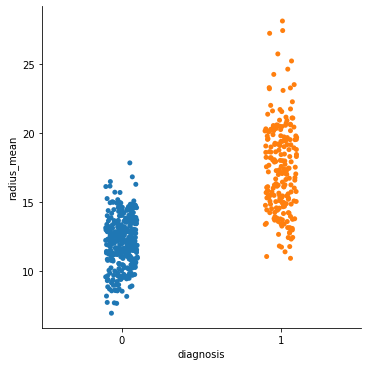

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x = 'diagnosis', y ='radius_mean', data = dataframe)

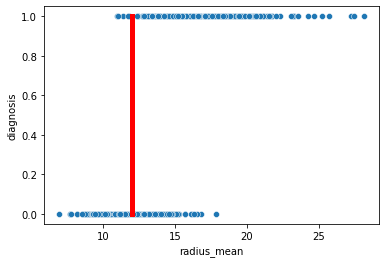

In [32]:
boundary = 12
sns.scatterplot(x = 'radius_mean', y = 'diagnosis', data = dataframe)
plt.plot([boundary, boundary], [0,1], 'r', linewidth = 5) #Draws the red line

In [33]:
#takes target boundary and sample array and categorizes point as Malignant or Benign by appending array that way
def boundary_classifier(target_boundary, x):
    dataArr = []
    for i in range(len(x)):
        if x[i] > target_boundary:
            dataArr.append(1)
        else:
            dataArr.append(0)
    return dataArr

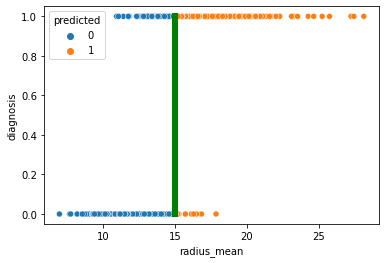

In [34]:
chosen_boundary = 15
y_pred = boundary_classifier(chosen_boundary, dataframe['radius_mean'])
dataframe['predicted'] = y_pred
y_true = dataframe['diagnosis']
sns.scatterplot(x = 'radius_mean', y = 'diagnosis', hue = 'predicted', data = dataframe)
plt.plot([chosen_boundary, chosen_boundary], [0, 1], 'g', linewidth = 6)


In [35]:
#computes subset accuracy using the true value and the predicted value 
accuracy = metrics.accuracy_score(y_true, y_pred)
accuracy

0.8892794376098418

Text(0.5, 257.44, 'Predicted diagnosis')

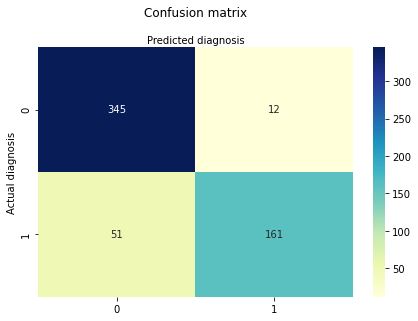

In [36]:
from sklearn import metrics
#creating the confusion matrix 
#confusion matrix info: https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
y_test = dataframe['diagnosis']
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
#visualizing the CFM
class_names = [0,1]
fig, ax = plt.subplots()
# Setting up and visualizing the plot (do not worry about the code below!)
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') # Creating heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual diagnosis')
plt.xlabel('Predicted diagnosis')


In [37]:
def confusionMatStats(y_test, y_pred):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    #out of all cases how much we predicted correctly
    precision = metrics.precision_score(y_test,y_pred)
    #of of all + cases we have predicted correctly, how many are actually positive
    recall = metrics.recall_score(y_test,y_pred)
    #out of all the positive cases, how much we predicted correctly
    print(accuracy)
    print(precision)
    print(recall)
confusionMatStats(y_test,y_pred)

0.8892794376098418
0.930635838150289
0.7594339622641509


In [42]:
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(dataframe, test_size = 0.4, random_state = 1)
#https://realpython.com/train-test-split-python-data/
print('Training data frame has %d rows'%train_df.shape[0])
train_df.head()


Training data frame has 341 rows


,diagnosis,radius_mean,area_mean,radius_se,area_se,smoothness_mean,predicted
164,1,23.270,1686.0,0.6642,97.85,0.08439,1
13,1,15.850,782.7,0.4033,36.58,0.08401,1
430,1,14.900,685.0,0.2530,24.19,0.09947,0
61,0,8.598,221.8,0.3582,18.39,0.12430,0
427,0,10.800,359.9,0.3077,20.20,0.08801,0


In [43]:
print('Testing data frame has %d rows'%test_df.shape[0])
test_df.head()

Testing data frame has 228 rows


,diagnosis,radius_mean,area_mean,radius_se,area_se,smoothness_mean,predicted
421,0,14.69,656.1,0.5462,49.45,0.10310,0
47,1,13.17,534.6,0.2871,24.25,0.11580,0
292,0,12.95,513.7,0.2094,17.67,0.10050,0
186,1,18.31,1041.0,0.2577,28.92,0.08588,1
414,1,15.13,719.5,0.4681,45.38,0.08320,1


In [45]:
input_label=['radius_mean']
output_label = 'diagnosis'

#Reminder: train_df was the training set
x_train = train_df[input_label]
print('Our x vars')
print(x_train.head())
print('\n')

y_train = train_df[output_label]
print('Our y vars')
print(y_train.head())
print('\n')



Our x vars
     radius_mean
164       23.270
13        15.850
430       14.900
61         8.598
427       10.800


Our y vars
164    1
13     1
430    1
61     0
427    0
Name: diagnosis, dtype: int64




In [46]:
#creating the reg object for line fitting(simililar to how it was set up for linear regression)
class_rm = linear_model.LogisticRegression()
#now you want to use the x input and y input to fit a line that predicts y from x
#.fit is training the dataset
class_rm.fit(x_train,y_train)

LogisticRegression()

In [47]:
#to make sure that our model is actually learning soemthing, you test it on unseen data
x_test = test_df[input_label]
#.squeeze removes single dimensional entries from array
y_test= test_df[output_label].values.squeeze()

In [49]:
y_pred = class_rm.predict(x_test)
print(y_pred)

[1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 1]


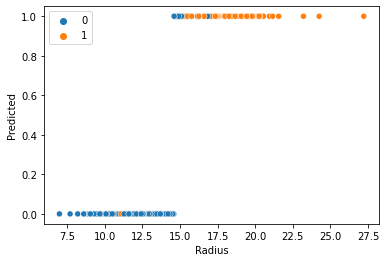

In [51]:
y_pred = y_pred.squeeze()
x_test_view = x_test[input_label].values.squeeze()
sns.scatterplot(x = x_test_view, y = y_pred, hue = y_test)
plt.xlabel('Radius')
plt.ylabel('Predicted')
plt.legend()